# Simple usage

This notebook demonstrates basic usage of the *openTSNE* library. This is sufficient for almost all use-cases.

In [15]:
import sys; sys.path.append("."); import utils
import warnings; warnings.filterwarnings("ignore")

from openTSNE import TSNE

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In most of the notebooks, we will be using the Macosko 2015 mouse retina data set. This is a fairly well-known and well explored data set in the single-cell literature making it suitable as an example.

In [2]:
import gzip
import pickle

with gzip.open("../benchmarks/data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


## Create train/test split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [5]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


## Run t-SNE

We'll first create an embedding on the training data.

In [6]:
tsne = TSNE(n_jobs=4, random_state=42, verbose=True)

In [7]:
%time embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(callbacks=None, callbacks_every_iters=50, early_exaggeration=12,
     early_exaggeration_iter=250, exaggeration=None, final_momentum=0.8,
     initial_momentum=0.5, initialization='pca', ints_in_interval=1,
     learning_rate='auto', max_grad_norm=None, metric='euclidean',
     metric_params=None, min_num_intervals=50, n_components=2,
     n_interpolation_points=3, n_iter=500, n_jobs=4,
     negative_gradient_method='fft', neighbors=None, perplexity=30,
     random_state=42, theta=0.5, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


/Users/Pavlin/miniconda3/envs/tsne/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


   --> Time elapsed: 5.12 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.05 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.07 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.8209, 50 iterations in 9.7003 sec
Iteration  100, KL divergence 5.2269, 50 iterations in 10.3401 sec
Iteration  150, KL divergence 5.1348, 50 iterations in 11.1576 sec
Iteration  200, KL divergence 5.0970, 50 iterations in 9.5107 sec
Iteration  250, KL divergence 5.0769, 50 iterations in 9.5213 sec
   --> Time elapsed: 50.23 seconds
===> Running optimization with exaggeration=1.00, lr=2501.75 for 500 iterations...
Iteration   50, KL divergence 3.5765, 50 iterations in 9.2750 sec
Iteration  100, KL divergence 3.1659, 50 iterations in 9.4267 sec
Iteration  150, KL divergence 2.9609, 50 iterations in 9.6471 sec
Iteration  200, KL divergence 2.8364, 50 iterations in 9.9121 sec
Iteration  250, KL 

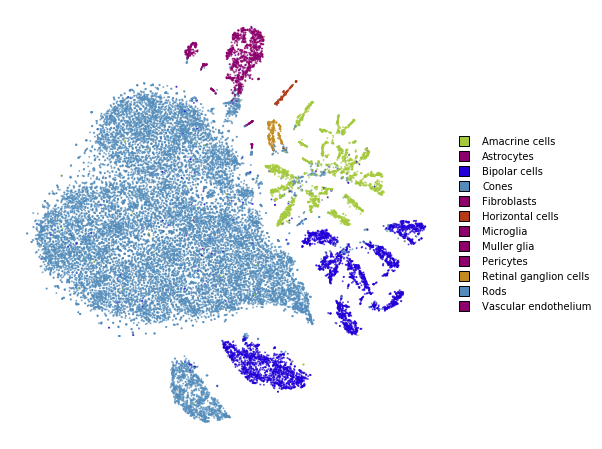

In [8]:
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

## Transform

openTSNE is currently the only library that allows embedding new points into an existing embedding.

In [12]:
%time embedding_test = embedding_train.transform(x_test)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.43 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.09 seconds
===> Running optimization with exaggeration=2.00, lr=0.10 for 50 iterations...
Iteration   50, KL divergence 213853.6779, 50 iterations in 5.2160 sec
   --> Time elapsed: 5.22 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 202439.2477, 50 iterations in 5.4097 sec
Iteration  100, KL divergence 202213.8967, 50 iterations in 5.2212 sec
Iteration  150, KL divergence 202140.0175, 50 iterations in 5.3641 sec
Iteration  200, KL divergence 202106.0768, 50 iterations in 6.9361 sec
Iteration  250, KL divergence 202082.5110, 50 iterations in 7.1343 sec
   --> Time elapsed: 30.07 seconds
CPU times: user 2min 14s, sys: 10.1 s, total: 2min 24s
Wall time: 37 s


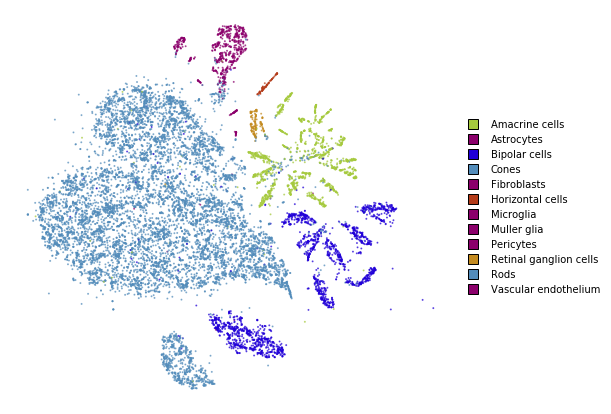

In [10]:
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)

## Together

We superimpose the transformed points onto the original embedding with larger opacity.

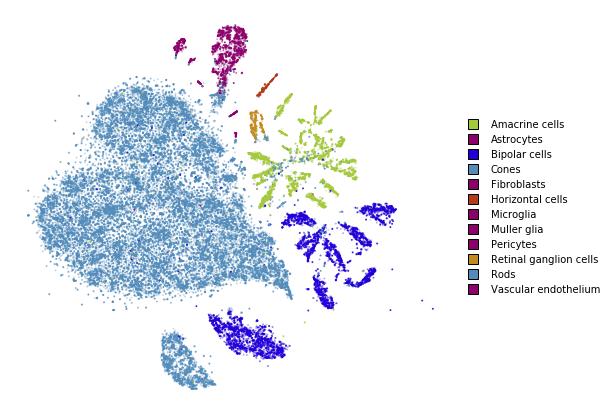

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)